<a href="https://colab.research.google.com/github/tuananhnguyen512/AI2023_class/blob/main/AI_b%C3%A1o_c%C3%A1o_cu%E1%BB%91i_k%C3%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#thư viên cho bước tiền xử lí
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.models import Sequential
from os import listdir
from os.path import isdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
import numpy as np
from keras.utils import to_categorical
#thư viện cho bước train mô hình
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
#thư viện cho bước test mô hình
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array


In [2]:
#kết nối ggdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#load file ảnh từ ggdrive đặt tên biến foler
folder = '/content/drive/MyDrive/Picture/conso/'
#tạo 2 list trông để chuẩn bị lữu trữ dữ liệu
photos, labels = list(), list()

In [4]:
#gán nhãn cho các giá trị 
#dùng vòng lặp for gán các biến:
for file in listdir(folder):
  output = 0.0
  if file.startswith('So0'):
    output = 1
  if file.startswith('So1'):
    output = 2
  if file.startswith('So2'):
    output = 3
  if file.startswith('So3'):
    output = 4
  if file.startswith('So4'):
    output = 5
  if file.startswith('So5'):
    output = 6
  if file.startswith('So6'):
    output = 7
  if file.startswith('So7'):
    output = 8
  if file.startswith('So8'):
    output = 9
  if file.startswith('So9'):
    output = 10
   #resize ảnh vừa xử lý về kích thước 50x50 pixel lưu vào biến 
  photo = load_img(folder+ file,target_size=(60,60))
  photo = img_to_array(photo)#chuyển định dạng ảnh từ PIL sang Numpy
  photos.append(photo)# cho tính lũy nhiều dữ lũy hình vào mảng photos
  labels.append(output)#thêm nhãn ảnh tương ứng
 
# chuyển dổi ảnh và tên nhãn dưới dạng Numpy
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)#in ra màn hình mảng hình ảnh với số nhãn tưởng ứng

(549, 60, 60, 3) (549,)


In [5]:
#lưu dữ liệu sau khi đã sử lí vào ggdrive
save('/content/drive/MyDrive/Pic_train/Number_photos.npy',photos)
save('/content/drive/MyDrive/Pic_train/Number_labels.npy',labels)

In [6]:
#đặt tên biến, lấy dữ liệu để sử dụng
x_train = np.load('/content/drive/MyDrive/Pic_train/Number_photos.npy')
y_train= np.load('/content/drive/MyDrive/Pic_train/Number_labels.npy')


In [7]:
#chuẩn hóa dữ liệu 
x_train = x_train.astype('float32')/255#chuyển x_train sang dịnh dạng float32, /255 thực hiện để chuẩn hóa các giá trị pixel
#dùng thư viên keras
y_train = to_categorical(y_train,100)#100 cho biết tổng số lớp.

In [8]:
#train mô hình 
model = Sequential()
# dùng lớp tích chập 2D 32 bộ lọc mỗi bộ lọc 3x3 pixel, padding same để giữ nguyên kích thước đầu vào
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(60,60,3),padding='Same'))
#thêm một lớp 2d để giảm kích thước đầu ra, bằng cách chọn giá trị lớn nhấttrong vùng không bị chồng
model.add(MaxPooling2D((2,2),padding='same'))
#lớp Dropout giúp chống overfitting 
model.add(Dropout(0.25))

#thực hiện lại các bước trên 
model.add(Conv2D(64,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))
#thực hiện lại các bước trên
model.add(Conv2D(128,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

# chuyển đổi đầu ra của các lớp trước đó thành một vector 1 chiều
model.add(Flatten())
#kich hoạt lớp fully connected
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.25))
#thêm một lớp cuối, softmax để phù hợp hóa bài toán 100 lớp
model.add(Dense(100,activation='softmax'))

#complie và train mô hình
model.compile(loss = categorical_crossentropy,
              optimizer = Adam(),
              metrics = ['accuracy'])
#ra thông tin tóm tắt về mô hình bao gồm số lượng và kích thước các layer.
model.summary()
#epochs=200, mô hình huấn luyện 200 vòng lặp để tối ưu hóa hàm mất mát
train = model.fit(x_train,y_train,batch_size=64,epochs = 200,verbose = 1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 64)        0

In [9]:
from keras.models import load_model
model.save('/content/drive/MyDrive/Model_Trained/Predict_Number_model.h5')

1/1 [==============================] - 0s 152ms/step
đây là:  So9


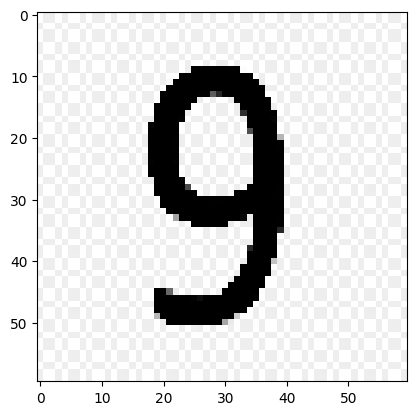

In [10]:
Conso = {1: 'So0',2:'So1', 3:'So2', 4:'So3',5:'So4', 6:'So5',7:'So6',8:'So7', 9:'So8', 10:'So9' }
img = load_img("/content/drive/MyDrive/Pic_test/test6.jpg",target_size=(60,60))
plt.imshow(img)
img = np.asarray(img)
img=img.reshape(1,60,60,3)
img = img.astype('float32')/255.0

result  = np.argmax(model.predict(img),axis=-1)
print("đây là: ", Conso[result[0]])


1/1 [==============================] - 0s 27ms/step
predicted number:  2


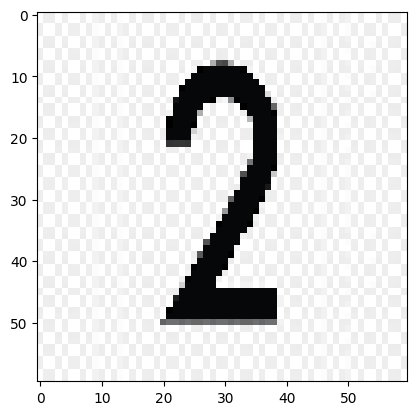

In [11]:
Conso = {1: '0',2:'1', 3:'2', 4:'3',5:'4', 6:'5',7:'6',8:'So7', 9:'8', 10:'9' }
img = load_img("/content/drive/MyDrive/Pic_test/test2.jpg",target_size=(60,60))
plt.imshow(img)
img = np.asarray(img)
img=img.reshape(1,60,60,3)
img = img.astype('float32')/255.0

result  = np.argmax(model.predict(img),axis=-1)
print("predicted number: ", Conso[result[0]])
